CUST_ID: Identificación del cliente

BALANCE: Saldo

BALANCE_FREQUENCY: Frecuencia de actualización del saldo

PURCHASES: Compras

ONEOFF_PURCHASES: Compras únicas (de una sola vez)

INSTALLMENTS_PURCHASES: Compras a plazos

CASH_ADVANCE: Adelanto de efectivo

PURCHASES_FREQUENCY: Frecuencia de compras

ONEOFF_PURCHASES_FREQUENCY: Frecuencia de compras únicas

PURCHASES_INSTALLMENTS_FREQUENCY: Frecuencia de compras a plazos

CASH_ADVANCE_FREQUENCY: Frecuencia de adelantos de efectivo

CASH_ADVANCE_TRX: Transacciones de adelanto de efectivo

PURCHASES_TRX: Transacciones de compras

CREDIT_LIMIT: Límite de crédito

PAYMENTS: Pagos

MINIMUM_PAYMENTS: Pagos mínimos

PRC_FULL_PAYMENT: Porcentaje de pago total

TENURE: Antigüedad        

Importacion de librerias

In [ ]:
# Importa la librería pandas, utilizada para la manipulación y análisis de datos en estructuras tipo DataFrame
import pandas as pd
# Importa la librería numpy, utilizada para operaciones numéricas y manejo de arreglos
import numpy as np
# Importa matplotlib.pyplot, una librería para crear visualizaciones estáticas en 2D
import matplotlib.pyplot as plt
# Importa seaborn, una biblioteca basada en matplotlib para visualizaciones estadísticas con estilo mejorado
import seaborn as sns
# Importa StandardScaler de scikit-learn, utilizado para estandarizar las características eliminando la media y escalando a la varianza unitaria
from sklearn.preprocessing import StandardScaler
# Importa PCA (Análisis de Componentes Principales) para reducción de dimensionalidad
from sklearn.decomposition import PCA
# Importa KMeans, para identificar los clusters
from sklearn.cluster import KMeans
# Importa DBSCAN, un algoritmo de clustering basado en densidad
from sklearn.cluster import DBSCAN
# Establece el estilo visual "whitegrid" en seaborn, lo que agrega una cuadrícula blanca de fondo a los gráficos
sns.set(style="whitegrid")

#1. Carga de datos:

In [ ]:
# Carga de dataset de “Credit Card Data”
df = pd.read_csv("/content/CC GENERAL.csv")
# Imprime las primeras filas del df
print("Primeras 5 filas del DF:")
display(df.head())
# Imprime informacion general del df
print("Informacion general del DF:")
display(df.info())
# Imprime las dimensiones del DF, es decir, el número de filas y columnas
print("Dimensiones:", df.shape)
# Genera estadísticas descriptivas de las columnas numéricas del DF, como media, desviación estándar, valores mínimos y máximos
print("Estadisticas descriptivas:")
display(df.describe())

Primeras 5 filas del DF:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Informacion general del DF:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 no

None

Dimensiones: (8950, 18)
Estadisticas descriptivas:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#2. Exploración y preprocesamiento de datos:

In [ ]:
# Imprime valores NaN del DF
print("Valores NaN:")
print(df.isna().sum)

Valores NaN:
<bound method DataFrame.sum of       CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       False    False              False      False             False   
1       False    False              False      False             False   
2       False    False              False      False             False   
3       False    False              False      False             False   
4       False    False              False      False             False   
...       ...      ...                ...        ...               ...   
8945    False    False              False      False             False   
8946    False    False              False      False             False   
8947    False    False              False      False             False   
8948    False    False              False      False             False   
8949    False    False              False      False             False   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \


Limpieza inicial de los datos:

- "MINIMUM_PAYMENTS" tiene valores NaN, y se tratara con la mediana, mientras tanto "CREDIT_LIMIT" tiene un valor faltante, por lo tanto se completara con la media.
- Se aplicara el metodo IQR para detectar outliers en variables clave como "BALANCE", "PURCHASES", "CASH_ADVANCE" y "CREDIT_LIMIT", y se eliminaran aquellos datos que caigan fuera de 1.5 * IQR.

- Finalmente se aplicara StandardScaler para que todas las variables tengan una distribución con media 0 y desviación estándar 1, asegurando que K-means y DBSCAN funcione correctamente.

In [ ]:
# Manejo de valores nulos
df.loc[:, 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df.loc[:, 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

# Eliminación de columna irrelevante
df.drop(columns=["CUST_ID"], inplace=True)

# Eliminación de valores atípicos con IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Selección de características clave
selected_features = [
    "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "PURCHASES_FREQUENCY",
    "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE", "CREDIT_LIMIT"
]
df_selected = df[selected_features]

# Escalado de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convertir a DataFrame escalado
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

Histogramas con seaborn para visualizar la distribucion de cada variable clave. Ayudara a identificar sesgos, valores extremos y patrones antes de aplicar K-means y DBSCAN.

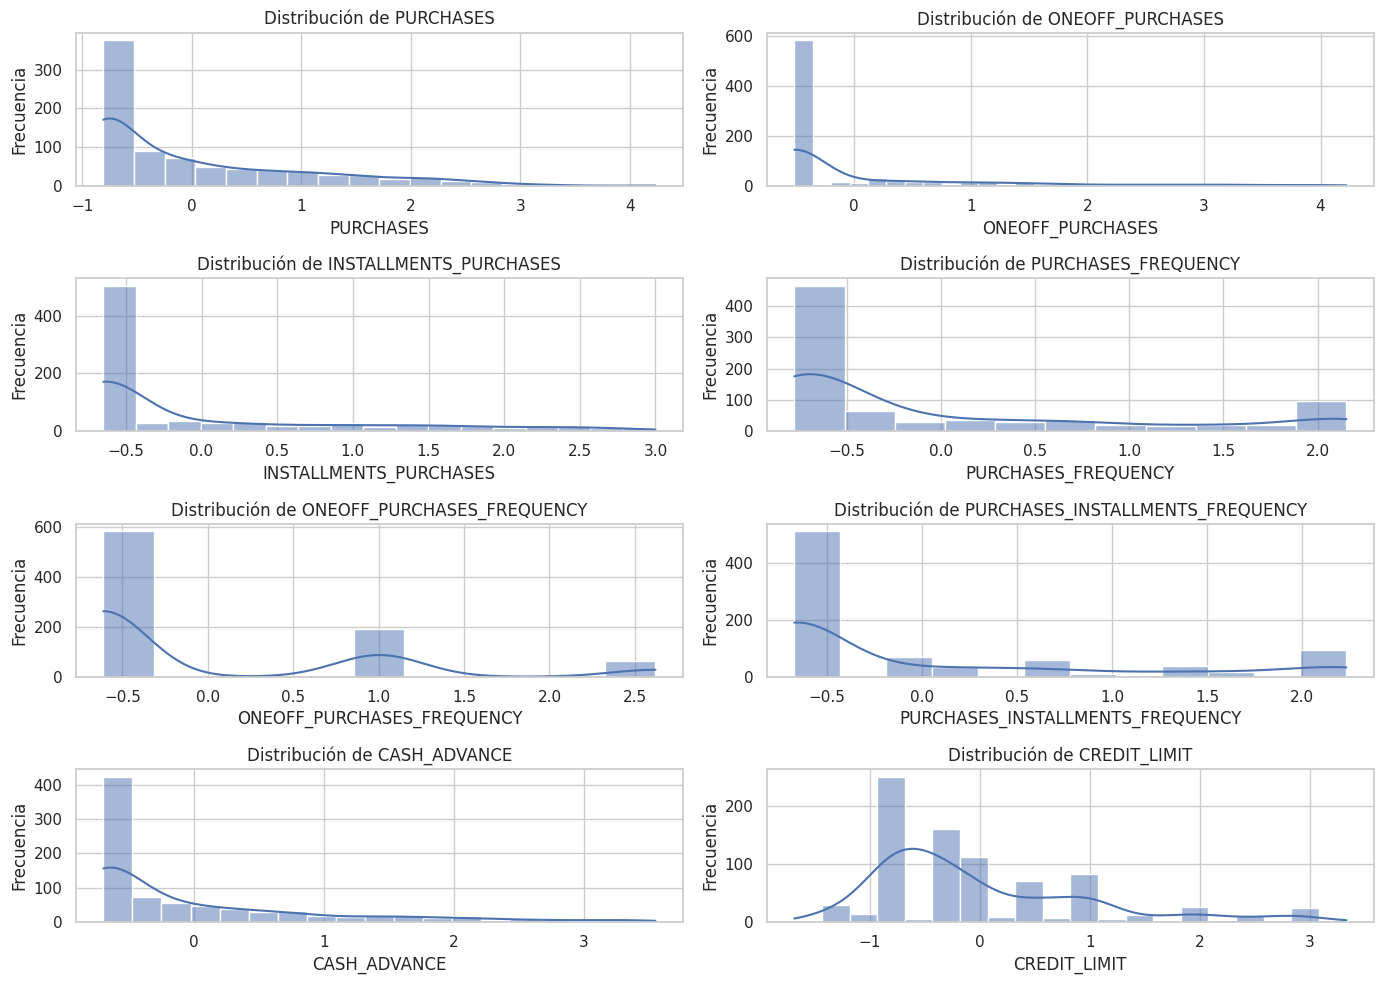

In [ ]:
# Generar gráficos
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df_scaled[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Reducción dimensionalidad

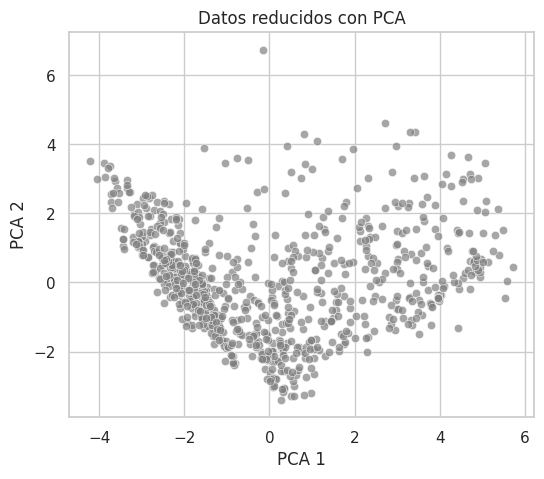

In [ ]:
# Crea un objeto PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
# Ajusta el PCA a los datos escalados y transforma los datos para obtener dos dimensiones principales
X_pca = pca.fit_transform(df_scaled)
# Configura el tamaño de la figura para la visualización
plt.figure(figsize=(6, 5))
# Crea un scatter plot con los dos componentes principales resultantes
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], color="gray", alpha=0.7)

# Añade un título descriptivo al gráfico
plt.title('Datos reducidos con PCA')
# Etiqueta el eje X con el nombre del primer componente principal
plt.xlabel('PCA 1')
# Etiqueta el eje Y con el nombre del segundo componente principal
plt.ylabel('PCA 2')
# Muestra el gráfico en pantalla
plt.show()

f_pca = pd.DataFrame(X_pca)  # Convertir a DataFrame
f_pca.to_csv("data_pca.csv", index=False)  # Guardar el archivo CSV

Analisis de la reduccion con PCA:

- Se puede observar que algunos grupos de puntos parecen estar más concentrados, lo que puede sugerir una estructura útil para clustering.

- Ademas no se ve una segmentación clara entre grupos, lo que significa que los algoritmos como K-means o DBSCAN tendrán que hacer el trabajo de identificar patrones.

#3. Aplicación de K-means:

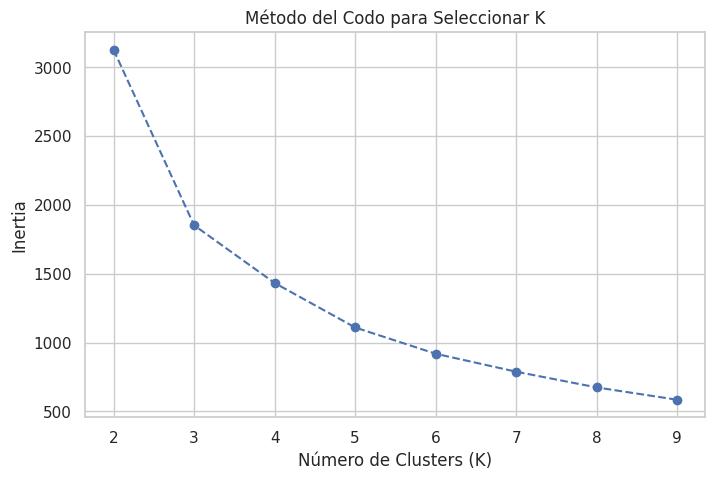

Silhouette Score de K-means despues de PCA: 0.5223


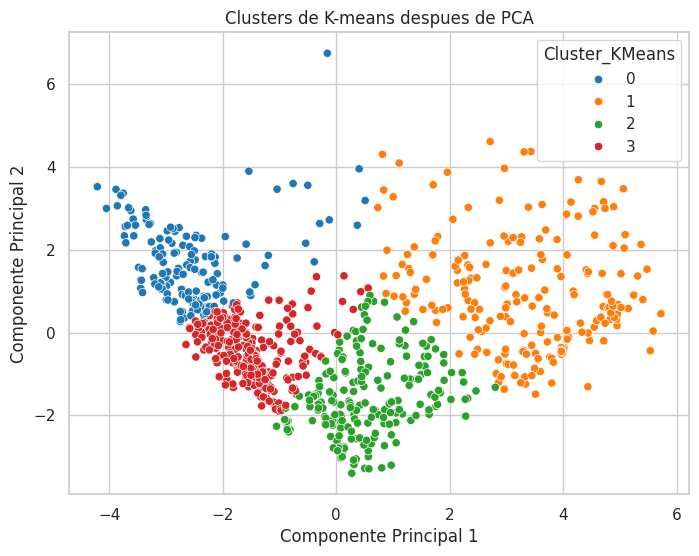

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Cargar datos reducidos con PCA
df_pca = pd.read_csv("data_pca.csv")

# Metodo del codo para K-means
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Visualizacion del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inertia")
plt.title("Método del Codo para Seleccionar K")
plt.show()

# Aplicacion de K-means con K optimo
optimal_k = 4  # Ajustar basado en el grafico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_pca["Cluster_KMeans"] = kmeans.fit_predict(df_pca)

# Evaluacion con Silhouette Score
silhouette_kmeans = silhouette_score(df_pca, df_pca["Cluster_KMeans"])
print(f"Silhouette Score de K-means despues de PCA: {silhouette_kmeans:.4f}")

# Visualizacion de clusters K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_pca["Cluster_KMeans"], palette="tab10")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters de K-means despues de PCA")
plt.show()


#3. Aplicación de DBSCAN:

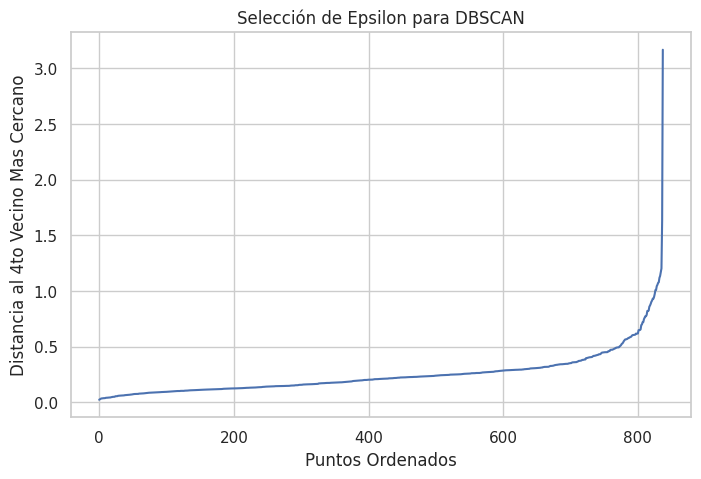

Silhouette Score de DBSCAN despues de PCA: 0.5936


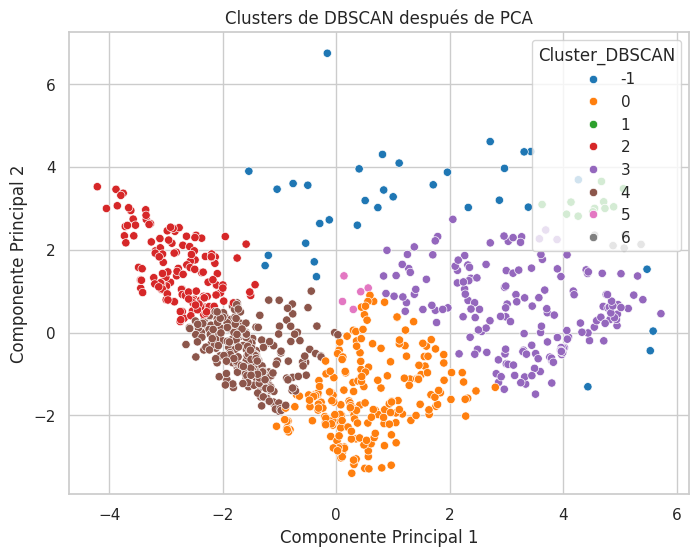

In [ ]:
# Seleccion de epsilon usando vecinos mas cercanos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)
distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Puntos Ordenados")
plt.ylabel("Distancia al 4to Vecino Mas Cercano")
plt.title("Selección de Epsilon para DBSCAN")
plt.show()

# Aplicacion de DBSCAN con valores optimos
eps_value = 0.5  # Ajustar basado en el grafico anterior
min_samples_value = 5  # Ajustar segun distribucion

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df_pca["Cluster_DBSCAN"] = dbscan.fit_predict(df_pca)

# Evaluacion de DBSCAN con Silhouette Score (solo si hay mas de 1 cluster valido)
if len(set(df_pca["Cluster_DBSCAN"])) > 1:
    silhouette_dbscan = silhouette_score(df_pca, df_pca["Cluster_DBSCAN"])
    print(f"Silhouette Score de DBSCAN despues de PCA: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN identifico solo un cluster o ruido despues de PCA, lo que impide calcular el silhouette score.")

# Visualización de clusters DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_pca["Cluster_DBSCAN"], palette="tab10")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters de DBSCAN después de PCA")
plt.show()

#4. Comparación mediante métricas:

Cluster_KMeans: Silhouette Score = 0.5223, Calinski-Harabasz Index = 1183.6343
Cluster_DBSCAN: Silhouette Score = 0.4110, Calinski-Harabasz Index = 614.6103


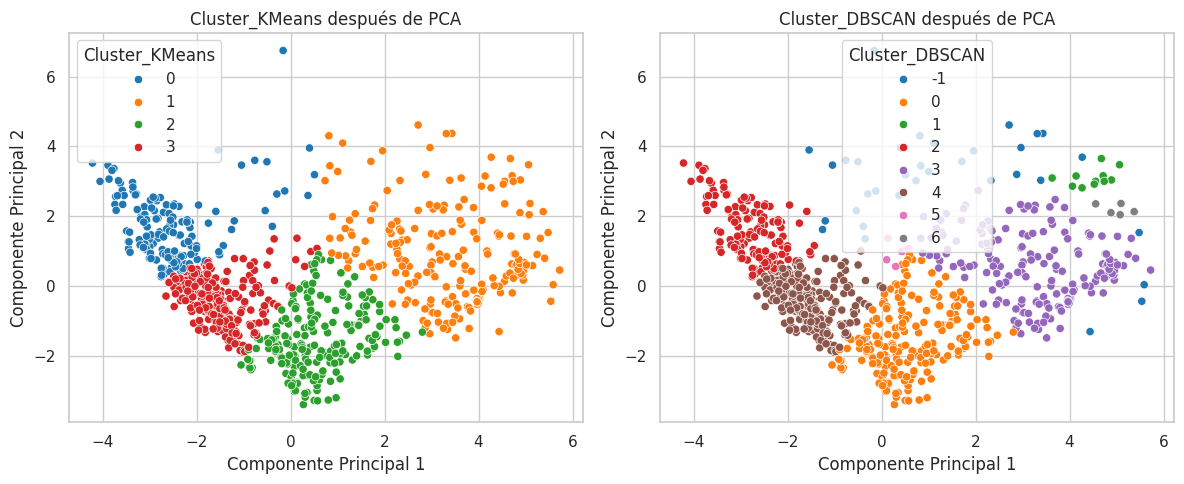

In [ ]:
from sklearn.metrics import  calinski_harabasz_score


# Cargar datos reducidos con PCA
df_pca = pd.read_csv("data_pca.csv")
# Aplicación de K-means con número óptimo de clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pca["Cluster_KMeans"] = kmeans.fit_predict(df_pca)
# Aplicación de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_pca["Cluster_DBSCAN"] = dbscan.fit_predict(df_pca)

# Evaluación de ambos métodos
for method in ["Cluster_KMeans", "Cluster_DBSCAN"]:
    if len(set(df_pca[method])) > 1:
        print(f"{method}: Silhouette Score = {silhouette_score(df_pca.iloc[:, :-1], df_pca[method]):.4f}, "
              f"Calinski-Harabasz Index = {calinski_harabasz_score(df_pca.iloc[:, :-1], df_pca[method]):.4f}")

# Visualización comparativa
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i, method in enumerate(["Cluster_KMeans", "Cluster_DBSCAN"]):
    sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_pca[method], palette="tab10", ax=ax[i])
    ax[i].set_title(f"{method} después de PCA")
    ax[i].set_xlabel("Componente Principal 1")
    ax[i].set_ylabel("Componente Principal 2")

plt.tight_layout()
plt.show()

#5. Interpretación de resultados:

A partir de los resultados obtenidos:

- Silhouette Score: K-means (0.5223) supera a DBSCAN (0.4110), lo que indica que los clusters formados por K-means tienen una mejor cohesión interna y están más separados entre sí.
- Calinski-Harabasz Index: K-means (1183.6343) también es superior al de DBSCAN (614.6103), lo que confirma que los grupos están mejor definidos y estructurados.

Conclusión:

K-means ofrece un rendimiento más sólido en este dataset, ya que forma clusters bien diferenciados con separaciones más claras. DBSCAN, aunque útil para detectar zonas densas, parece menos efectivo en estructurar los datos de manera homogénea debido a la dispersión observada en los gráficos.

Conclusión sobre los outliers:

Si la detección de comportamientos inusuales es clave, DBSCAN puede ser más relevante, ya que aísla a los clientes con patrones de consumo poco frecuentes. Si se busca una estructura más clara de grupos homogéneos, K-means es la mejor opción.

#Análisis de Resultados

**Evaluación de la forma de los clusters**:

K-means:
- Produce clusters bien definidos y estructurados, con fronteras claras entre los grupos.
- Asigna cada punto a un cluster, asegurando una segmentación homogénea.

DBSCAN:
- Detecta zonas de alta densidad, lo que permite encontrar patrones más naturales en los datos.
- Puede generar demasiados pequeños clusters, lo que dificulta la interpretación en algunos casos.


**Evaluación de outliers**:

K-means:
- No detecta explícitamente outliers, ya que asigna todos los puntos a un cluster, incluso si algunos deberían considerarse ruido.

DBSCAN:
- Identifica puntos como ruido (Cluster -1), evitando que outliers afecten los clusters.

En términos métricos, K-means ofrece mejor rendimiento, ya que forma grupos definidos y estructurados, mientras que DBSCAN presenta segmentación menos clara con zonas dispersas de datos.


**¿Qué algoritmo es más adecuado?**

Si el objetivo es obtener una segmentación clara y estructurada para clasificar clientes de manera homogénea, K-means es la mejor opción. Si es importante detectar comportamientos atípicos o analizar zonas de alta densidad sin forzar la asignación de cada cliente a un cluster, DBSCAN es más útil.

Para este dataset específico, considerando métricas y distribución de los datos, K-means es la opción más sólida, ya que ofrece clusters bien definidos con mejor cohesión y separación.